<h1 align="center">MOM6 diagnostics for KPP single column cooling test case</h1> 

 Results from this notebook: 
1. Basic diagnostics of KPP boundary layer and prognostic fields, comparing various vertical resolution results. 

Assumptions regarding this notebook:
0. Use of Python 3 or more recent. 
1. This notebook is written for the MOM6-examples/ocean_only/CVMix SCM tests.  
2. This notebook makes use of four simulations, each with differing vertical grid spacing.
   The uniform grid spacings are dz=40cm,1m,10m, enabled via NK=1000,400,40 inside MOM_inputs.
   The nonuniform grid is based on the OM4 grid, enabled via setting NK=75, MAXIMUM_DEPTH=6500.0,
   and ALE_COORDINATE_CONFIG = "FILE:vgrid_75_2m.nc,dz", where vgrid_75_2m.nc is located in 
   MOM6-examples/ice_ocean_SIS2/OM4_025/INPUT.

Hopes for the use of this notebook: 
1. To provide a starting point to document single column model tests;
2. To illustrate a self-contained iPython notebook of use for MOM6 analysis.  

This iPython notebook was originally developed at NOAA/GFDL, and it is provided freely to the MOM6 community. GFDL scientists developing MOM6 make extensive use of Python for diagnostics. We solicit modifications/fixes that are useful to the MOM6 community.

In [75]:
import numpy
import scipy.io.netcdf
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 4.0)

expt_name = 'cooling_KPP'

fname_A1 = './KPP/visc_40cm.nc'
fname_B1 = './KPP/visc_1m.nc'
fname_C1 = './KPP/visc_10m.nc'
fname_D1 = './KPP/visc_CM4.nc'

fname_A2 = './KPP/prog_40cm.nc'
fname_B2 = './KPP/prog_1m.nc'
fname_C2 = './KPP/prog_10m.nc'
fname_D2 = './KPP/prog_CM4.nc'


deltaz_A = '40cm'
deltaz_B = '1m'
deltaz_C = '10m'
deltaz_D = 'CM4'

fname_deltaz_A = '_40cm'
fname_deltaz_B = '_1m'
fname_deltaz_C = '_10m'
fname_deltaz_D = '_CM4'

ymin = -110
secday = 86400

dpi=200

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [76]:
visc = scipy.io.netcdf_file(fname_A1,'r')

# recall data layout is (t,z,y,x)

time = visc.variables['Time'][:]

# KPP boundary layer depth as function of time (metre)
h_A = visc.variables['KPP_OBLdepth'][:,0,0]

# MLD as function of time (metre)
mld_A = visc.variables['MLD_003'][:,0,0]

# KPP tracer diffusivity as function of time and depth (m2/sec)
Kt_A = visc.variables['KPP_Kheat'][:,:,0,0]

# total tracer diffusivity as function of time and depth (m2/sec)
Kd_A = visc.variables['Kd_interface'][:,:,0,0]

# KPP velocity diffusivity as function of time and depth (m2/sec)
Ku_A = visc.variables['KPP_Kv'][:,:,0,0]

# surface (and penetrating) buoyancy flux, as used by [CVmix] KPP (m2/s3)
KPP_buoyFlux_A = visc.variables['KPP_buoyFlux'][:,:,0,0]

# Temperature tendency due to non-local transport of heat, as calculated by KPP (K/s)
KPP_dTdt_A = visc.variables['KPP_NLT_dTdt'][:,:,0,0]


prog  = scipy.io.netcdf_file(fname_A2,'r')
   
# depth of cell interface     
zi_A = prog.variables['zi'][:]

# depth of cell center 
zl_A = prog.variables['zl'][:]

# zonal velocity as function of time and depth
u_A  = prog.variables['u'][:,:,0,0]

# zonal velocity as function of time and depth
v_A  = prog.variables['v'][:,:,0,0]

# temperature as function of time and depth 
temp_A = prog.variables['temp'][:,:,0,0]


/usr/local/x64/python/3.4.3/lib/python3.4/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [77]:
visc = scipy.io.netcdf_file(fname_B1,'r')

# recall data layout is (t,z,y,x)

time = visc.variables['Time'][:]

# KPP boundary layer depth as function of time (metre)
h_B = visc.variables['KPP_OBLdepth'][:,0,0]

# MLD as function of time (metre)
mld_B = visc.variables['MLD_003'][:,0,0]

# KPP tracer diffusivity as function of time and depth (m2/sec)
Kt_B = visc.variables['KPP_Kheat'][:,:,0,0]

# total tracer diffusivity as function of time and depth (m2/sec)
Kd_B = visc.variables['Kd_interface'][:,:,0,0]

# KPP velocity diffusivity as function of time and depth (m2/sec)
Ku_B = visc.variables['KPP_Kv'][:,:,0,0]

# surface (and penetrating) buoyancy flux, as used by [CVmix] KPP (m2/s3)
KPP_buoyFlux_B = visc.variables['KPP_buoyFlux'][:,:,0,0]

# Temperature tendency due to non-local transport of heat, as calculated by KPP (K/s)
KPP_dTdt_B = visc.variables['KPP_NLT_dTdt'][:,:,0,0]


prog  = scipy.io.netcdf_file(fname_B2,'r')
   
# depth of cell interface     
zi_B = prog.variables['zi'][:]

# depth of cell center 
zl_B = prog.variables['zl'][:]

# zonal velocity as function of time and depth
u_B  = prog.variables['u'][:,:,0,0]

# zonal velocity as function of time and depth
v_B  = prog.variables['v'][:,:,0,0]

# temperature as function of time and depth 
temp_B = prog.variables['temp'][:,:,0,0]


/usr/local/x64/python/3.4.3/lib/python3.4/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [78]:
visc = scipy.io.netcdf_file(fname_C1,'r')

# recall data layout is (t,z,y,x)

time = visc.variables['Time'][:]

# KPP boundary layer depth as function of time (metre)
h_C = visc.variables['KPP_OBLdepth'][:,0,0]

# MLD as function of time (metre)
mld_C = visc.variables['MLD_003'][:,0,0]

# KPP tracer diffusivity as function of time and depth (m2/sec)
Kt_C = visc.variables['KPP_Kheat'][:,:,0,0]

# total tracer diffusivity as function of time and depth (m2/sec)
Kd_C = visc.variables['Kd_interface'][:,:,0,0]

# KPP velocity diffusivity as function of time and depth (m2/sec)
Ku_C = visc.variables['KPP_Kv'][:,:,0,0]

# surface (and penetrating) buoyancy flux, as used by [CVmix] KPP (m2/s3)
KPP_buoyFlux_C = visc.variables['KPP_buoyFlux'][:,:,0,0]

# Temperature tendency due to non-local transport of heat, as calculated by KPP (K/s)
KPP_dTdt_C = visc.variables['KPP_NLT_dTdt'][:,:,0,0]


prog  = scipy.io.netcdf_file(fname_C2,'r')
   
# depth of cell interface     
zi_C = prog.variables['zi'][:]

# depth of cell center 
zl_C = prog.variables['zl'][:]

# zonal velocity as function of time and depth
u_C  = prog.variables['u'][:,:,0,0]

# zonal velocity as function of time and depth
v_C  = prog.variables['v'][:,:,0,0]

# temperature as function of time and depth 
temp_C = prog.variables['temp'][:,:,0,0]


/usr/local/x64/python/3.4.3/lib/python3.4/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [79]:
visc = scipy.io.netcdf_file(fname_D1,'r')

# recall data layout is (t,z,y,x)

time = visc.variables['Time'][:]

# KPP boundary layer depth as function of time (metre)
h_D = visc.variables['KPP_OBLdepth'][:,0,0]

# MLD as function of time (metre)
mld_D = visc.variables['MLD_003'][:,0,0]

# KPP tracer diffusivity as function of time and depth (m2/sec)
Kt_D = visc.variables['KPP_Kheat'][:,:,0,0]

# total tracer diffusivity as function of time and depth (m2/sec)
Kd_D = visc.variables['Kd_interface'][:,:,0,0]

# KPP velocity diffusivity as function of time and depth (m2/sec)
Ku_D = visc.variables['KPP_Kv'][:,:,0,0]

# surface (and penetrating) buoyancy flux, as used by [CVmix] KPP (m2/s3)
KPP_buoyFlux_D = visc.variables['KPP_buoyFlux'][:,:,0,0]

# Temperature tendency due to non-local transport of heat, as calculated by KPP (K/s)
KPP_dTdt_D = visc.variables['KPP_NLT_dTdt'][:,:,0,0]


prog  = scipy.io.netcdf_file(fname_D2,'r')
   
# depth of cell interface     
zi_D = prog.variables['zi'][:]

# depth of cell center 
zl_D = prog.variables['zl'][:]

# zonal velocity as function of time and depth
u_D  = prog.variables['u'][:,:,0,0]

# zonal velocity as function of time and depth
v_D  = prog.variables['v'][:,:,0,0]

# temperature as function of time and depth 
temp_D = prog.variables['temp'][:,:,0,0]


/usr/local/x64/python/3.4.3/lib/python3.4/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


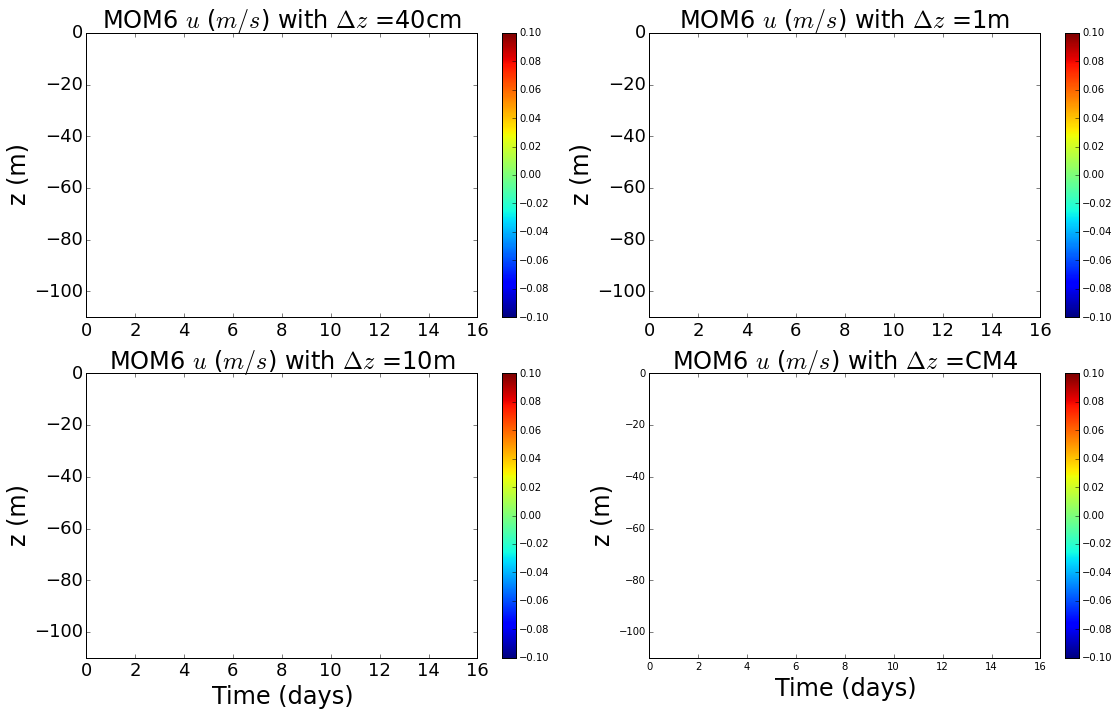

In [80]:
fig, ax = plt.subplots(figsize=(16, 10), dpi=dpi)

plt.subplot(221)
data   = u_A
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_A
deltaz = deltaz_A 
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.1, vmax=0.1)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $u$ ($m/s$) with $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(221)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(222)
data   = u_B
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_B
deltaz = deltaz_B
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.1, vmax=0.1)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $u$ ($m/s$) with $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(222)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(223)
data   = u_C
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_C
deltaz = deltaz_C
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.1, vmax=0.1)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $u$ ($m/s$) with $\Delta z$ ='+deltaz,fontsize=24)
plt.xlabel('Time (days)',fontsize=24);
plot = fig.add_subplot(223)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(224)
data   = u_D
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_D
deltaz = deltaz_D
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.1, vmax=0.1)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $u$ ($m/s$) with $\Delta z$ ='+deltaz,fontsize=24)
plt.xlabel('Time (days)',fontsize=24);
plot = fig.add_subplot(223)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)



plt.tight_layout()
fname = expt_name+'_MOM6_zonal_velocity.png'
fig.savefig(fname,dpi=dpi);

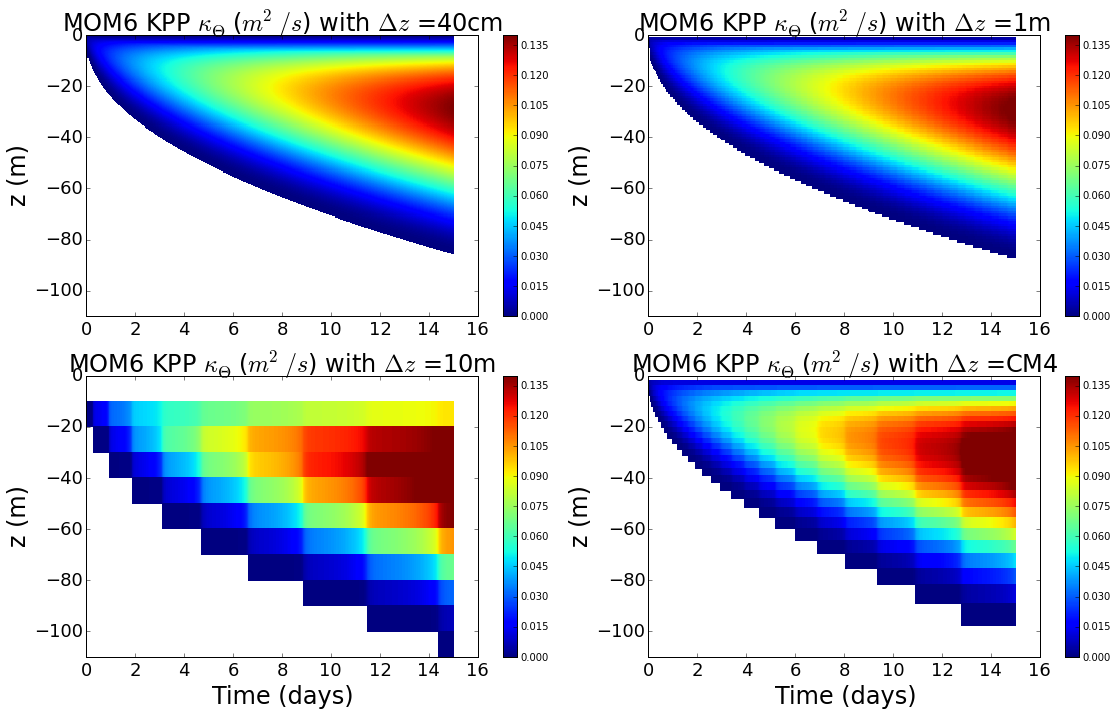

In [81]:
# KPP diffusivity  

figure(1)
fig = plt.figure(figsize=(16,10), dpi=dpi)

plt.subplot(221)
data   = Kt_A
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_A
deltaz = deltaz_A 
CS = plt.pcolormesh(time, -depths, field.T, vmin=0.0, vmax=0.14)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 KPP $\kappa_{\Theta}$ ($m^2/s$) with $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(221)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(222)
data   = Kt_B
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_B
deltaz = deltaz_B
CS = plt.pcolormesh(time, -depths, field.T, vmin=0.0, vmax=0.14)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 KPP $\kappa_{\Theta}$ ($m^2/s$) with $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(222)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(223)
data   = Kt_C
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_C
deltaz = deltaz_C
CS = plt.pcolormesh(time, -depths, field.T, vmin=0.0, vmax=0.14)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 KPP $\kappa_{\Theta}$ ($m^2/s$) with $\Delta z$ ='+deltaz,fontsize=24)
plt.xlabel('Time (days)',fontsize=24);
plot = fig.add_subplot(223)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(224)
data   = Kt_D
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_D
deltaz = deltaz_D
CS = plt.pcolormesh(time, -depths, field.T, vmin=0.0, vmax=0.14)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 KPP $\kappa_{\Theta}$ ($m^2/s$) with $\Delta z$ ='+deltaz,fontsize=24)
plt.xlabel('Time (days)',fontsize=24);
plot = fig.add_subplot(224)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.tight_layout()
fname = expt_name+'_MOM6_KPP_diffusivity.png'
fig.savefig(fname,dpi=dpi);



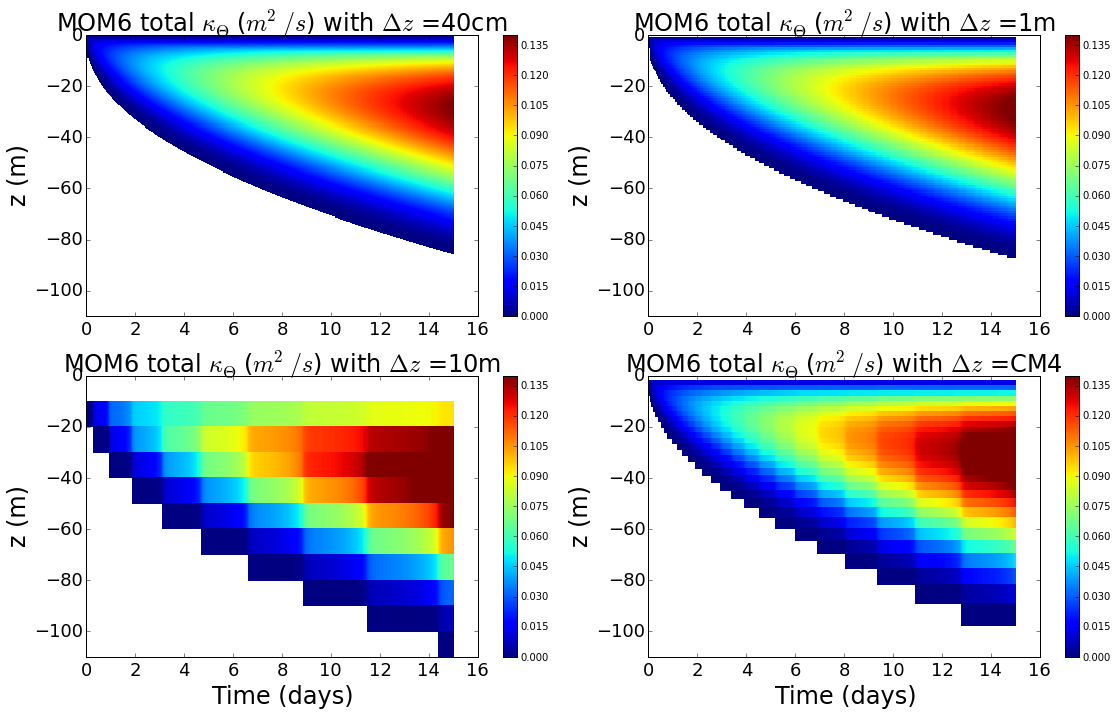

In [82]:
# Total diffusivity  

figure(1)
fig = plt.figure(figsize=(16,10), dpi=dpi)

plt.subplot(221)
data   = Kd_A
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_A
deltaz = deltaz_A 
CS = plt.pcolormesh(time, -depths, field.T, vmin=0.0, vmax=0.14)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 total $\kappa_{\Theta}$ ($m^2/s$) with $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(221)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(222)
data   = Kd_B
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_B
deltaz = deltaz_B
CS = plt.pcolormesh(time, -depths, field.T, vmin=0.0, vmax=0.14)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 total $\kappa_{\Theta}$ ($m^2/s$) with $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(222)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(223)
data   = Kd_C
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_C
deltaz = deltaz_C
CS = plt.pcolormesh(time, -depths, field.T, vmin=0.0, vmax=0.14)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 total $\kappa_{\Theta}$ ($m^2/s$) with $\Delta z$ ='+deltaz,fontsize=24)
plt.xlabel('Time (days)',fontsize=24);
plot = fig.add_subplot(223)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(224)
data   = Kd_D
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_D
deltaz = deltaz_D
CS = plt.pcolormesh(time, -depths, field.T, vmin=0.0, vmax=0.14)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 total $\kappa_{\Theta}$ ($m^2/s$) with $\Delta z$ ='+deltaz,fontsize=24)
plt.xlabel('Time (days)',fontsize=24);
plot = fig.add_subplot(224)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.tight_layout()
fname = expt_name+'_MOM6_Kd_interface.png'
fig.savefig(fname,dpi=dpi);



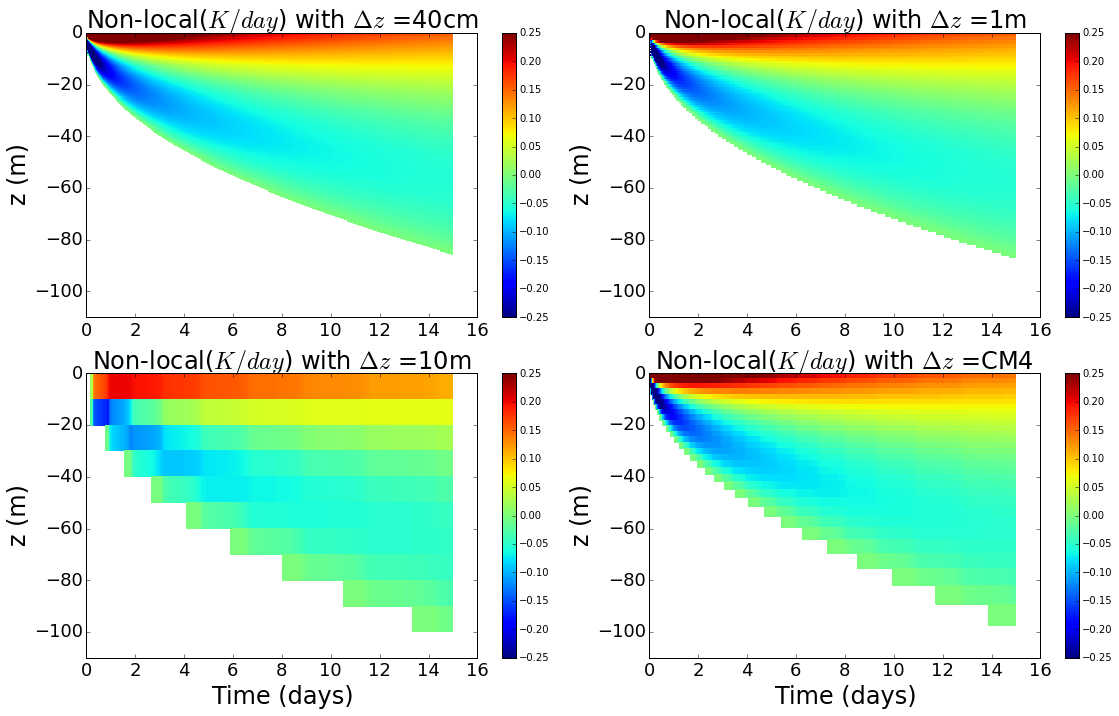

In [83]:
# KPP non-local transport  


figure(1)
fig = plt.figure(figsize=(16,10), dpi=dpi)

plt.subplot(221)
data   = secday*KPP_dTdt_A
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_A
deltaz = deltaz_A 
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.25, vmax=.25)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'Non-local($K/day$) with $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(221)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(222)
data   = secday*KPP_dTdt_B
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_B
deltaz = deltaz_B
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.25, vmax=.25)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'Non-local($K/day$) with $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(222)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(223)
data   = secday*KPP_dTdt_C
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_C
deltaz = deltaz_C
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.25, vmax=.25)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'Non-local($K/day$) with $\Delta z$ ='+deltaz,fontsize=24)
plt.xlabel('Time (days)',fontsize=24);
plot = fig.add_subplot(223)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(224)
data   = secday*KPP_dTdt_D
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zi_D
deltaz = deltaz_D
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.25, vmax=.25)
plt.colorbar()
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'Non-local($K/day$) with $\Delta z$ ='+deltaz,fontsize=24)
plt.xlabel('Time (days)',fontsize=24);
plot = fig.add_subplot(224)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.tight_layout()
fname = expt_name+'_MOM6_nonlocal_temp_tendency.png'
fig.savefig(fname,dpi=dpi);



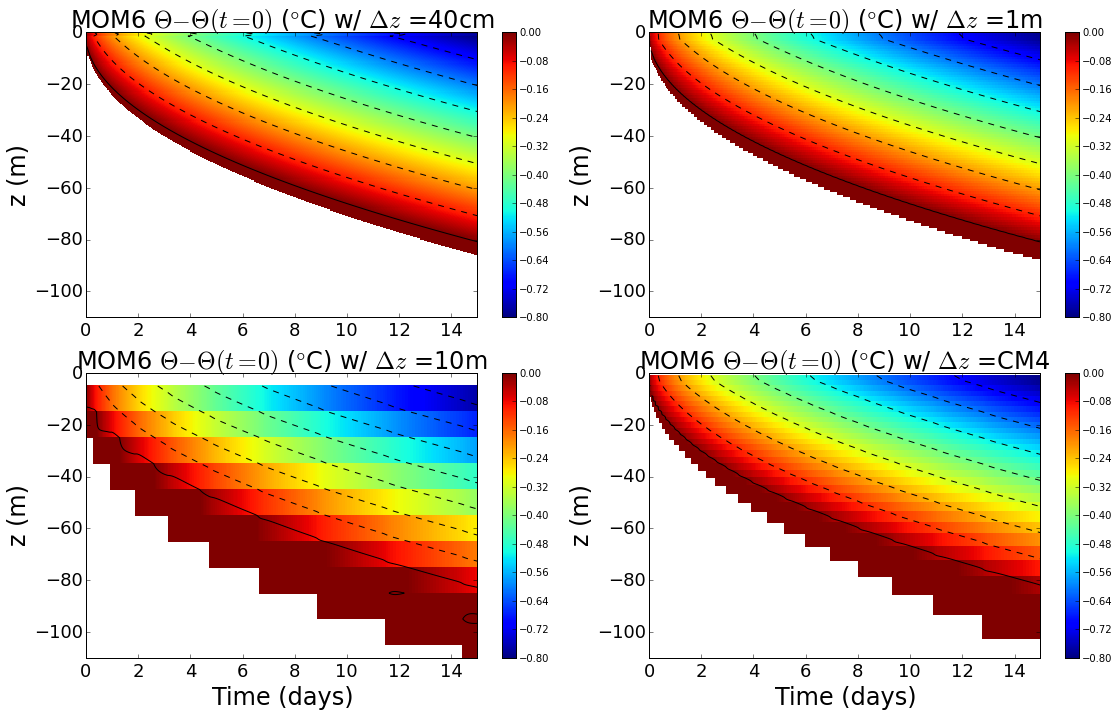

In [84]:
# temperature drift

figure(1)
fig = plt.figure(figsize=(16,10), dpi=dpi)

plt.subplot(221)
data   = temp_A[:,:] - temp_A[0,:]
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_A
deltaz = deltaz_A
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.8, vmax=0)
plt.colorbar()
C = plt.contour(time, -depths, field.T, 8, linewidth=.02, colors='black')
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\Theta-\Theta(t=0)$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(221)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)

plt.subplot(222)
data   = temp_B[:,:] - temp_B[0,:]
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_B
deltaz = deltaz_B
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.80, vmax=0.0)
plt.colorbar()
C = plt.contour(time, -depths, field.T, 8, linewidth=.02, colors='black')
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\Theta-\Theta(t=0)$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(222)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)

plt.subplot(223)
data   = temp_C[:,:] - temp_C[0,:]
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_C
deltaz = deltaz_C
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.80, vmax=0.0)
plt.colorbar()
C = plt.contour(time, -depths, field.T, 8, linewidth=.02, colors='black')
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.xlabel('Time (days)',fontsize=24)
plt.title(r'MOM6 $\Theta-\Theta(t=0)$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(223)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)

plt.subplot(224)
data   = temp_D[:,:] - temp_D[0,:]
field  = np.ma.masked_array(data, mask=[data==0.])
depths = zl_D
deltaz = deltaz_D
CS = plt.pcolormesh(time, -depths, field.T, vmin=-.80, vmax=0.0)
plt.colorbar()
C = plt.contour(time, -depths, field.T, 8, linewidth=.02, colors='black')
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.xlabel('Time (days)',fontsize=24)
plt.title(r'MOM6 $\Theta-\Theta(t=0)$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(224)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)

plt.tight_layout()
fname = expt_name+'_MOM6_temp_drift.png'
fig.savefig(fname,dpi=dpi);



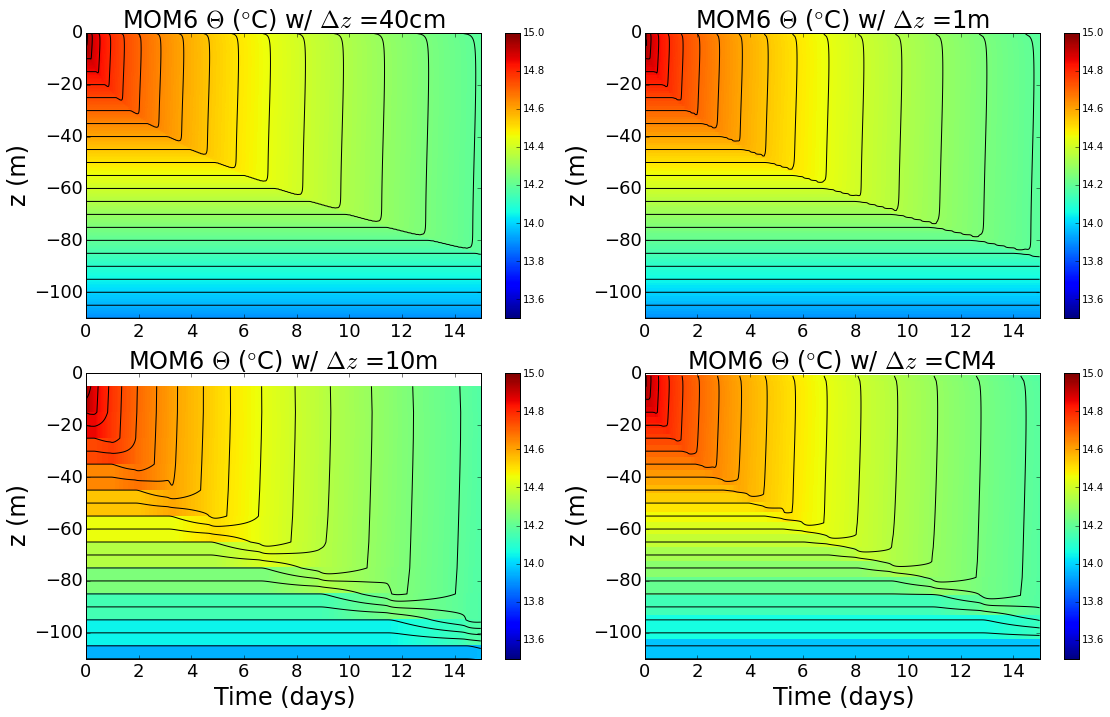

In [92]:
# temperature 

figure(1)
fig = plt.figure(figsize=(16,10), dpi=dpi)

plt.subplot(221)
field = temp_A[:,:]
depths = zl_A
deltaz = deltaz_A
CS = plt.pcolormesh(time, -depths, field.T, vmin=13.5, vmax=15)
plt.colorbar()
C = plt.contour(time, -depths, field.T, levels=numpy.arange(10,17,.05), linewidth=.5, colors='black')
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\Theta$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(221)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(222)
field = temp_B[:,:]
depths = zl_B
deltaz = deltaz_B
CS = plt.pcolormesh(time, -depths, field.T, vmin=13.5, vmax=15)
plt.colorbar()
C = plt.contour(time, -depths, field.T, levels=numpy.arange(10,17,.05), linewidth=.5, colors='black')
plt.ylim((ymin,0))
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\Theta$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(222)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(223)
field = temp_C[:,:]
depths = zl_C
deltaz = deltaz_C
CS = plt.pcolormesh(time, -depths, field.T, vmin=13.5, vmax=15)
#CS = plt.pcolormesh(time, -depths, field.T)
plt.colorbar()
C = plt.contour(time, -depths, field.T, levels=numpy.arange(10,17,.05), linewidth=.5, colors='black')
plt.ylim((ymin,0))
plt.xlabel('Time (days)',fontsize=24)
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\Theta$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(223)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)


plt.subplot(224)
field = temp_D[:,:]
depths = zl_D
deltaz = deltaz_D
CS = plt.pcolormesh(time, -depths, field.T, vmin=13.5, vmax=15)
plt.colorbar()
C = plt.contour(time, -depths, field.T, levels=numpy.arange(10,17,.05), linewidth=.5, colors='black')
plt.ylim((ymin,0))
plt.xlabel('Time (days)',fontsize=24)
plt.ylabel('z (m)',fontsize=24)
plt.title(r'MOM6 $\Theta$ ($\degree$C) w/ $\Delta z$ ='+deltaz,fontsize=24);
plot = fig.add_subplot(224)
plot.tick_params(axis='both', which='major', labelsize=18)
plot.tick_params(axis='both', which='minor', labelsize=18)



plt.tight_layout()
fname = expt_name+'_MOM6_temp.png'
fig.savefig(fname,dpi=dpi);


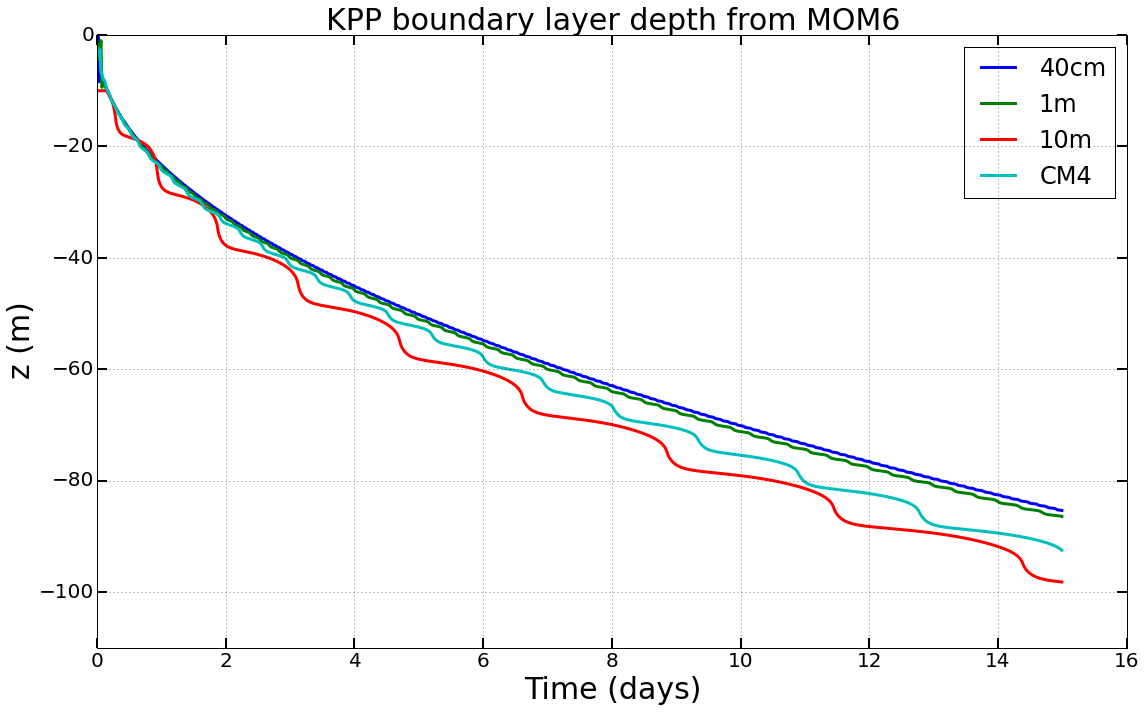

In [93]:
# Boundary layer depth

figure(1)
fig, ax = plt.subplots(figsize=(16, 10), dpi=dpi)

field = h_A
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_A)
field = h_B
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_B)
field = h_C
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_C)
field = h_D
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_D)

ax.legend(fontsize=24,loc='upper right')

ax.tick_params('both', length=10, width=2, which='major',labelsize=20)
ax.tick_params('both', length=10, width=2, which='minor',labelsize=20)
plt.ylim((-110,0))

plt.grid()
plt.xlabel('Time (days)',fontsize=30)
plt.ylabel('z (m)',fontsize=30)
plt.title(r'KPP boundary layer depth from MOM6',fontsize=30)
#ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=30)
#ax.set_xticklabels(["$%.1f$" % x for x in xticks], fontsize=30);

plt.tight_layout()
fname = expt_name+'_MOM6_bldepth.png'
fig.savefig(fname,dpi=dpi);



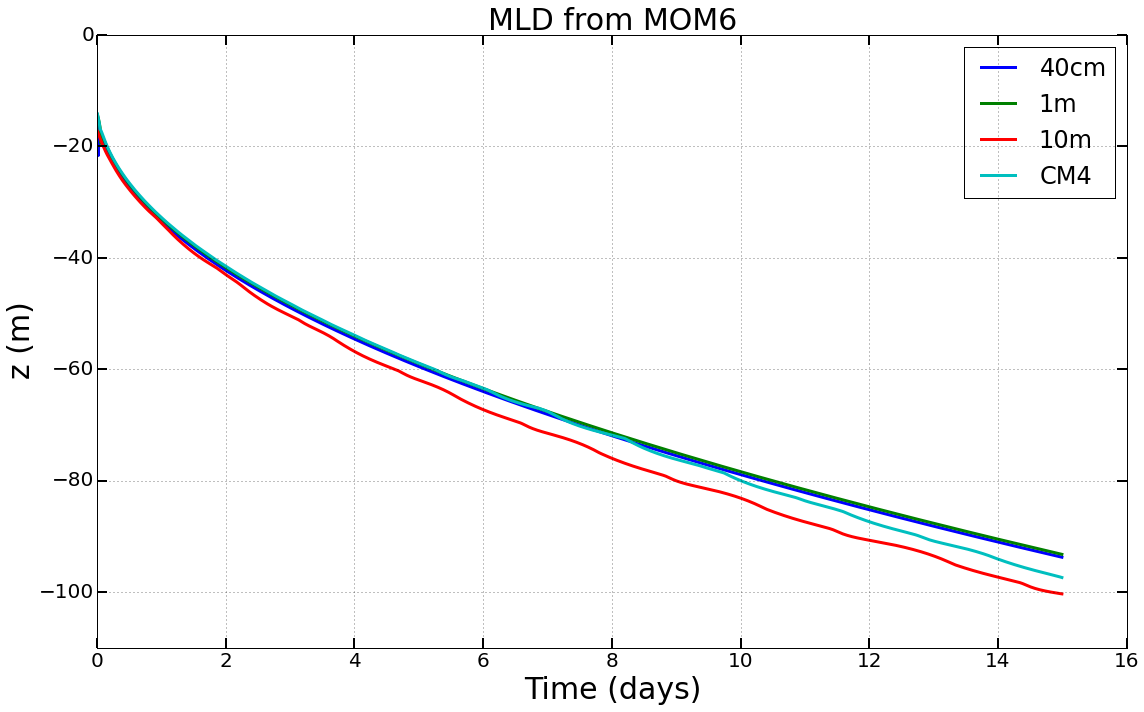

In [94]:
# Mixed layer depth

figure(1)
fig, ax = plt.subplots(figsize=(16, 10), dpi=dpi)

field = mld_A
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_A)
field = mld_B
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_B)
field = mld_C
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_C)
field = mld_D
CS = plt.plot(time, -field,'-',linewidth=3, label=deltaz_D)

ax.legend(fontsize=24,loc='upper right')


ax.tick_params('both', length=10, width=2, which='major',labelsize=20)
ax.tick_params('both', length=10, width=2, which='minor',labelsize=20)
plt.ylim((-110,0))

plt.grid()
plt.xlabel('Time (days)',fontsize=30)
plt.ylabel('z (m)',fontsize=30)
plt.title(r'MLD from MOM6',fontsize=30)
#ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=30)
#ax.set_xticklabels(["$%.1f$" % x for x in xticks], fontsize=30);

plt.tight_layout()
fname = expt_name+'_MOM6_mld.png'
fig.savefig(fname,dpi=dpi);



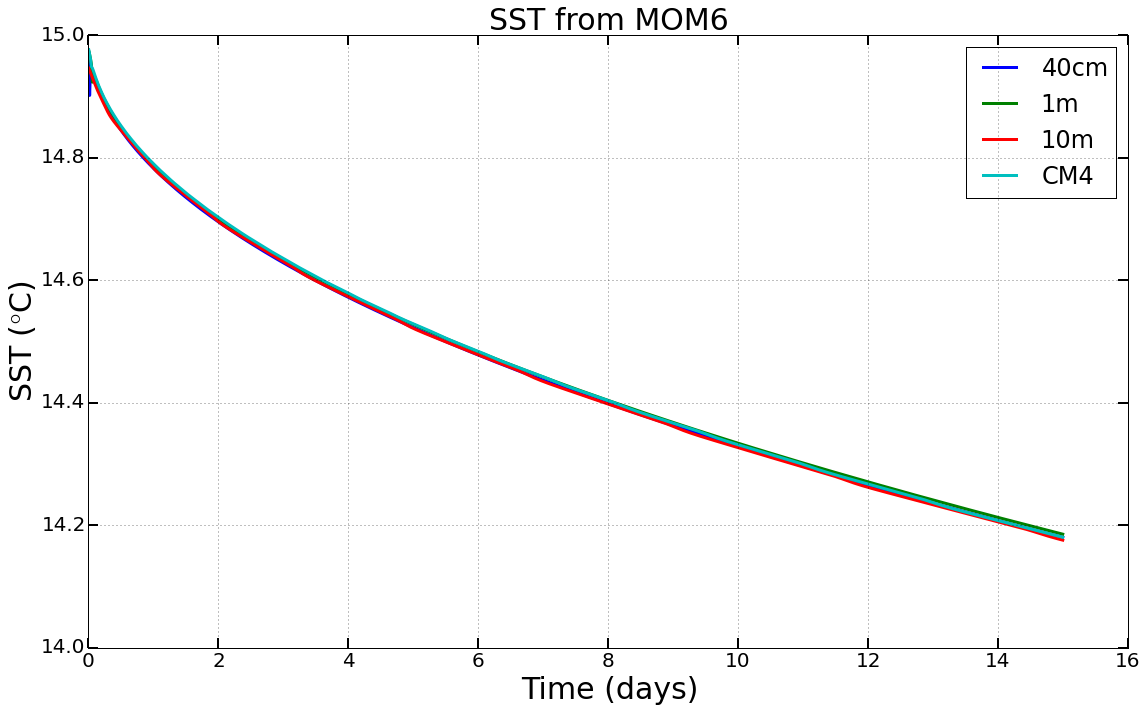

In [95]:
# SST

figure(1)
fig, ax = plt.subplots(figsize=(16, 10), dpi=dpi)

field = temp_A[:,0]
CS = plt.plot(time, field,'-',linewidth=3, label=deltaz_A)
field = temp_B[:,0]
CS = plt.plot(time, field,'-',linewidth=3, label=deltaz_B)
field = temp_C[:,0]
CS = plt.plot(time, field,'-',linewidth=3, label=deltaz_C)
field = temp_D[:,0]
CS = plt.plot(time, field,'-',linewidth=3, label=deltaz_D)

ax.legend(fontsize=24,loc='upper right')

ax.tick_params('both', length=10, width=2, which='major',labelsize=20)
ax.tick_params('both', length=10, width=2, which='minor',labelsize=20)
plt.ylim((14,15))

plt.grid()
plt.ylabel(r'SST ($\degree$C)',fontsize=30)
plt.xlabel('Time (days)',fontsize=30)
plt.title(r'SST from MOM6',fontsize=30)

plt.tight_layout()
fname = expt_name+'_MOM6_SST.png'
fig.savefig(fname,dpi=dpi);

